# Imports

In [ ]:
%pip install seaborn

In [ ]:
%pip install scikit-learn

In [ ]:
%pip install random-word

In [ ]:
%pip install nltk

In [17]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from random_word import RandomWords
import nltk
from nltk.stem import WordNetLemmatizer

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zsheldon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Generate fake keyword data
- no categories

In [6]:
# random keywords
rw = RandomWords()
rand_keywords = rw.get_random_words()
print(rand_keywords)

['blegged', 'disjunctivist', 'ingratiates', 'semi-circle', 'municipally', 'floodgate', 'reinstatement', 'treviso', 'invidia', 'encroached', 'arises', 'chely', 'archdiocese', 'crouch-ware', 'parishes', 'Mohawk River', 'lyricless', 'tutus', 'phthalocyanine', 'eviscerating', 'pararectal', 'bemired', 'skerrick', 'defilade', 'fascinated', 'conservancy', 'attempting', 'doodle', 'interjected', 'walers', 'jaunt', 'Soufrière', 'confronts', 'Brenner Pass', 'finishers', 'insufficiently', 'Millerchip', 'supertankers', 'corking-pin', 'castral', 'expurgating', 'catty-corner', 'cognizability', 'mary jane', 'finbacks', 'biocomputer', 'resilin', 'stockyards', 'sextant', 'enthralments']


In [7]:
# lemmatize
lemmatizer = WordNetLemmatizer()
lemma_keywords = np.array([lemmatizer.lemmatize(k) for k in rand_keywords])
print(lemma_keywords)

['blegged' 'disjunctivist' 'ingratiates' 'semi-circle' 'municipally'
 'floodgate' 'reinstatement' 'treviso' 'invidia' 'encroached' 'arises'
 'chely' 'archdiocese' 'crouch-ware' 'parish' 'Mohawk River' 'lyricless'
 'tutu' 'phthalocyanine' 'eviscerating' 'pararectal' 'bemired' 'skerrick'
 'defilade' 'fascinated' 'conservancy' 'attempting' 'doodle' 'interjected'
 'walers' 'jaunt' 'Soufrière' 'confronts' 'Brenner Pass' 'finisher'
 'insufficiently' 'Millerchip' 'supertanker' 'corking-pin' 'castral'
 'expurgating' 'catty-corner' 'cognizability' 'mary jane' 'finback'
 'biocomputer' 'resilin' 'stockyard' 'sextant' 'enthralments']


In [8]:
num_users = 100
users = [f"user_{i}" for i in range(num_users)]
num_keywords = 50
mean_responses = 15
std_responses = 5
keywords = lemma_keywords
similar_users = [("user_0","user_1"),("user_2","user_3"),("user_4","user_5")]
keyword_dict = {k:[] for k in keywords}

for user in users:
    # copy responses from partnered similar user
    sim_user = False
    for pair_of_users in similar_users:
        if user == pair_of_users[1]:
            for k in keywords:
                keyword_dict[k].append(keyword_dict[k][-1])
            sim_user = True
            continue
    if sim_user:
        continue
    
    # generate random responses
    num_responses = int(np.random.normal(mean_responses,std_responses))
    keywords_responded = np.random.choice(keywords,size=num_responses,replace=False)
    for k in keywords:
        if k in keywords_responded:
            keyword_dict[k].append(1)
        else:
            keyword_dict[k].append(0)

keyword_df = pd.DataFrame(keyword_dict,index=users)
keyword_df

,blegged,disjunctivist,ingratiates,semi-circle,municipally,floodgate,reinstatement,treviso,invidia,encroached,...,expurgating,catty-corner,cognizability,mary jane,finback,biocomputer,resilin,stockyard,sextant,enthralments
user_0,0,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
user_1,0,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
user_2,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
user_3,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
user_4,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_95,0,1,0,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,1
user_96,1,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
user_97,0,1,1,1,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
user_98,0,0,1,0,0,1,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0


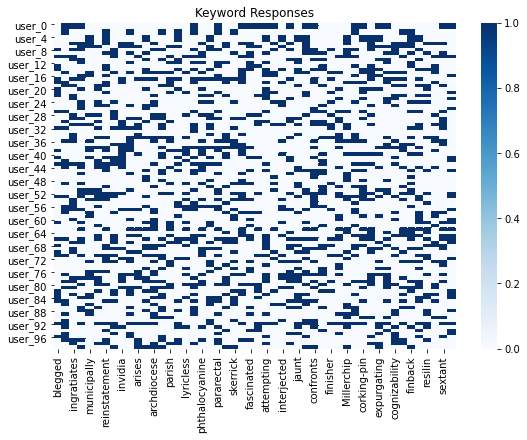

In [9]:
plt.figure(figsize=(9,6))
sns.heatmap(keyword_df,cmap="Blues")
plt.title("Keyword Responses")
plt.show()

# Compute cosine similarity between pairs of users

In [18]:
keyword_arr = keyword_df.to_numpy()
keyword_arr.shape

(100, 50)

In [19]:
cos_similarity = cosine_similarity(keyword_arr)
cos_similarity.shape

(100, 100)

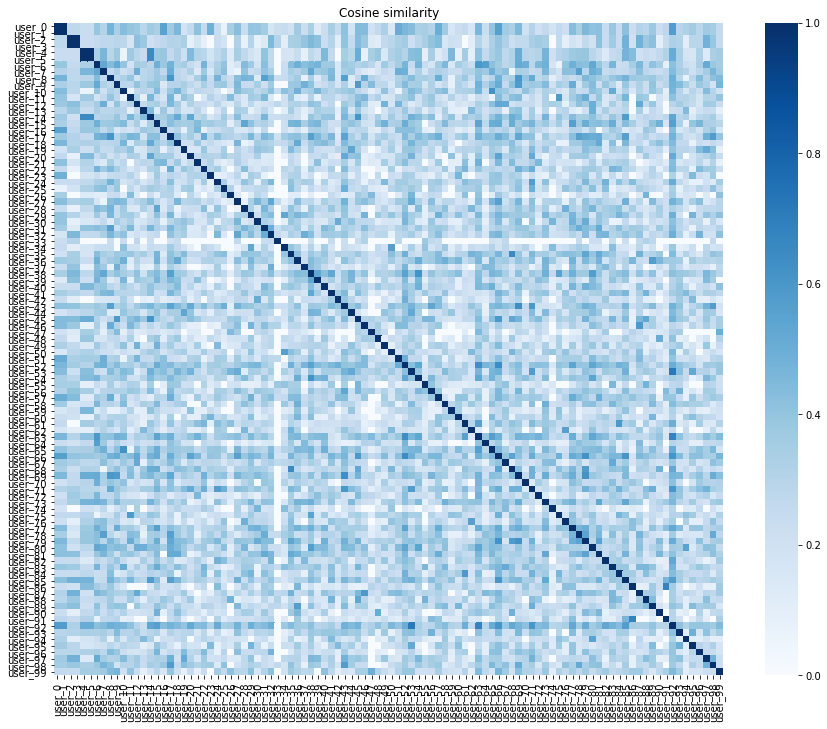

In [35]:
plt.figure(figsize=(15,12))
sns.heatmap(cos_similarity,cmap="Blues",xticklabels=users,yticklabels=users)
plt.title("Cosine similarity")
plt.show()

# Jaccard similarity score

In [30]:
jacc_similarity = np.zeros((100,100))
for i,user_keywords in enumerate(keyword_arr):
    other_users = np.delete(keyword_arr,np.where(users==user)[0],axis=0)
    for j,other_user in enumerate(other_users):
        jacc_similarity[i,j] = jaccard_score(user_keywords,other_user)

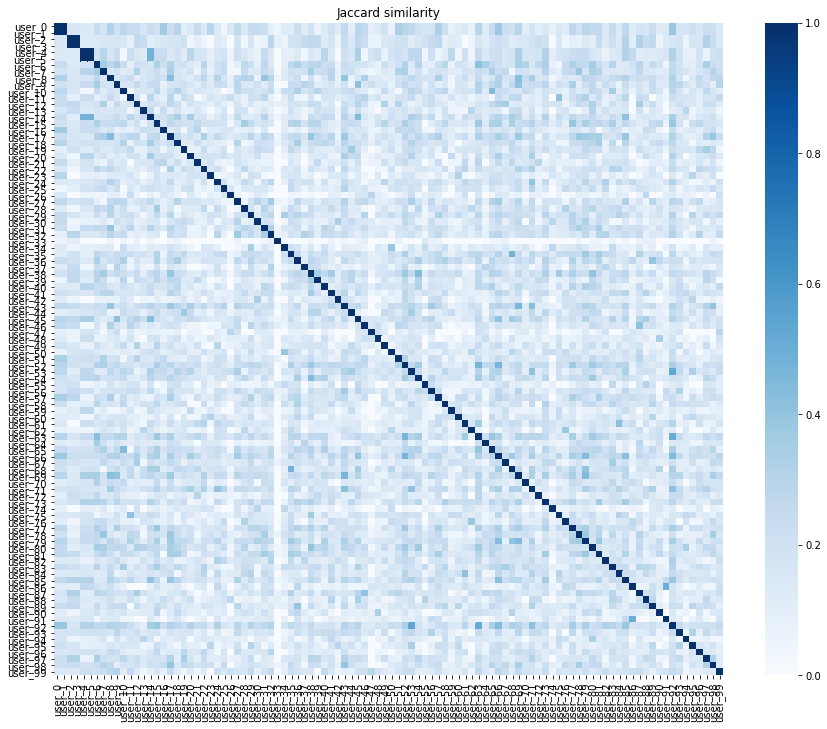

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(jacc_similarity,cmap="Blues",xticklabels=users,yticklabels=users)
plt.title("Jaccard similarity")
plt.show()

# Similarity rankings

In [37]:
def similarity_rankings(users, similarity_scores, num_recs: int=5) -> pd.DataFrame:
    user_recs_dict = {"user":[],"recommendation":[],"score":[], "ranking":[]}
    for i,user in enumerate(users):
        # get sim scores and remove current user
        curr_sim_scores = np.delete(similarity_scores[i].copy(),i)
        curr_users = np.delete(np.array(users.copy()),i)
        # get recs
        for i in range(num_recs):
            user_recs_dict["user"].append(user)
            # current most similar user and score
            top_sim_idx = np.argmax(curr_sim_scores)
            top_sim_user = curr_users[top_sim_idx]
            top_sim_score = curr_sim_scores[top_sim_idx]
            user_recs_dict["recommendation"].append(top_sim_user)
            user_recs_dict["score"].append(top_sim_score)
            user_recs_dict["ranking"].append(i+1)
            # remove from lists
            curr_sim_scores = np.delete(curr_sim_scores,top_sim_idx)
            curr_users = np.delete(curr_users,top_sim_idx)

    user_recs = pd.DataFrame.from_dict(user_recs_dict)
    return user_recs

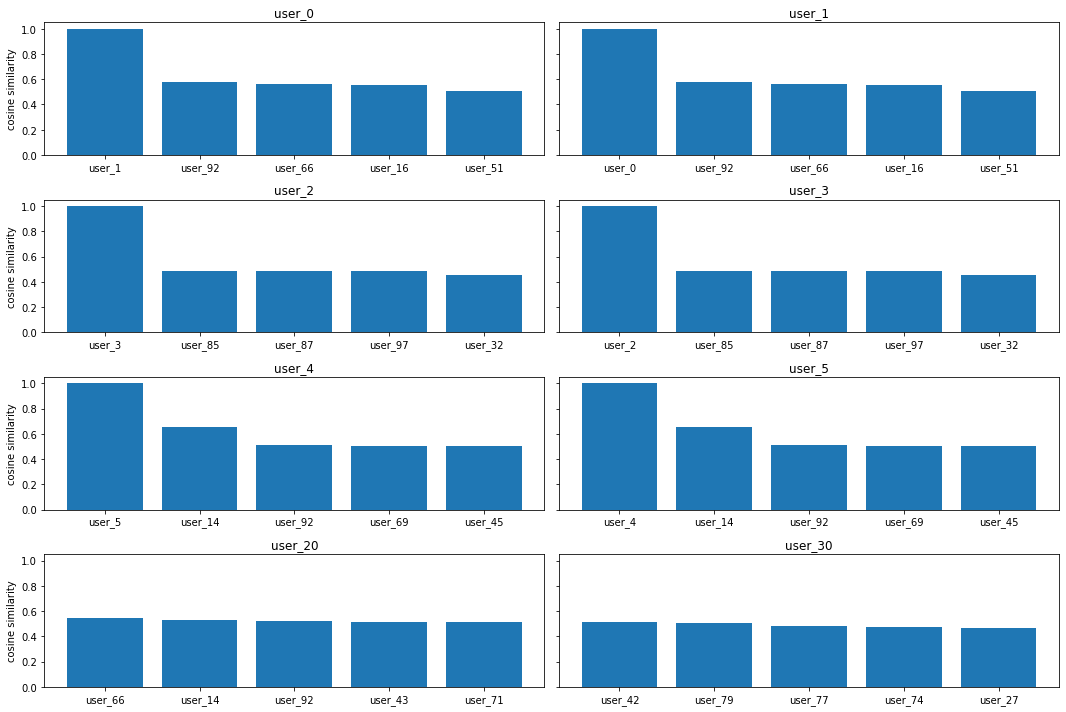

In [40]:
cos_user_recs = similarity_rankings(users, cos_similarity)
rand_users = ["user_0","user_1","user_2","user_3","user_4","user_5","user_20","user_30"]
fig,axes = plt.subplots(4,2,figsize=(15,10),sharey=True)
for i,(user,ax) in enumerate(zip(rand_users,np.ravel(axes))):
    curr_user = cos_user_recs[cos_user_recs["user"]==user]
    ax.bar(curr_user.recommendation,curr_user.score)
    ax.set_title(user)
    ax.set_ylabel("cosine similarity") if not i%2 else ax.set_ylabel("")
plt.tight_layout()
plt.show()

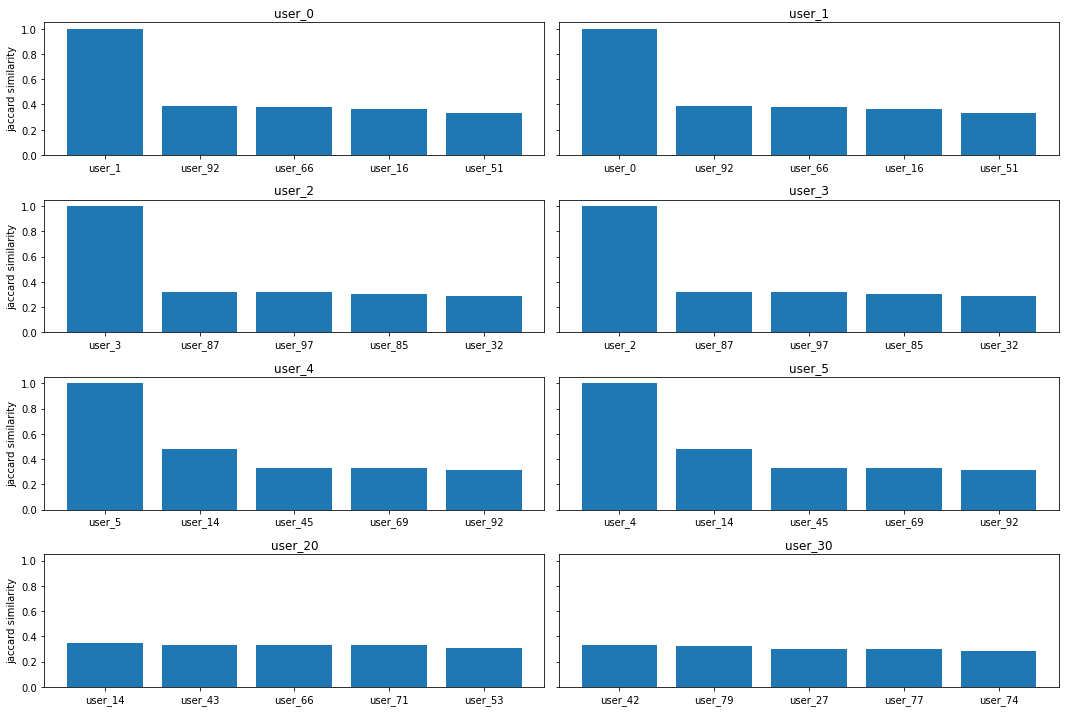

In [41]:
jacc_user_recs = similarity_rankings(users, jacc_similarity)
rand_users = ["user_0","user_1","user_2","user_3","user_4","user_5","user_20","user_30"]
fig,axes = plt.subplots(4,2,figsize=(15,10),sharey=True)
for i,(user,ax) in enumerate(zip(rand_users,np.ravel(axes))):
    curr_user = jacc_user_recs[jacc_user_recs["user"]==user]
    ax.bar(curr_user.recommendation,curr_user.score)
    ax.set_title(user)
    ax.set_ylabel("jaccard similarity") if not i%2 else ax.set_ylabel("")
plt.tight_layout()
plt.show()